# Removing Color

Complete the following tasks to convert a color picture into black and white.

In [1]:
# Don't modify this cell, just run it. 

import numpy as np
import matplotlib.pyplot as plt
from EC_CV import *
%config InlineBackend.figure_formats = 'retina'
from matplotlib import rcParams
import cv2

rcParams['figure.figsize'] = (10, 8)


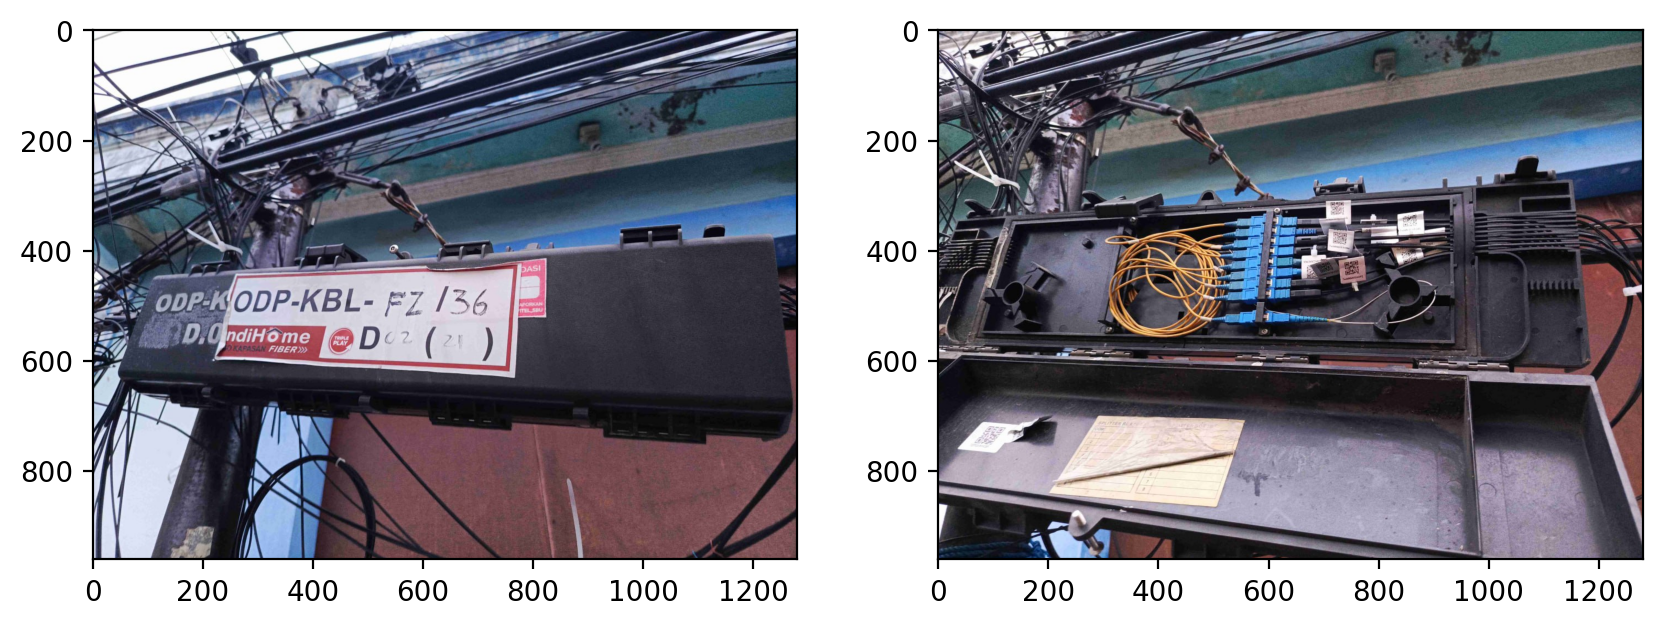

In [4]:
# Task #1: Print a color image
#
# Copy an image file of your own in this folder, 
# open it and display it.

# Write your code here
rcParams['figure.figsize'] = 10,14
img_in = plt.imread('odp closure in.jpeg')
# plt.axis("off")
# plt.imshow(img_in)

img_out = plt.imread('odp closure out.jpeg')
# plt.axis("off")
# plt.imshow(img_out)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_out)
ax[1].imshow(img_in)

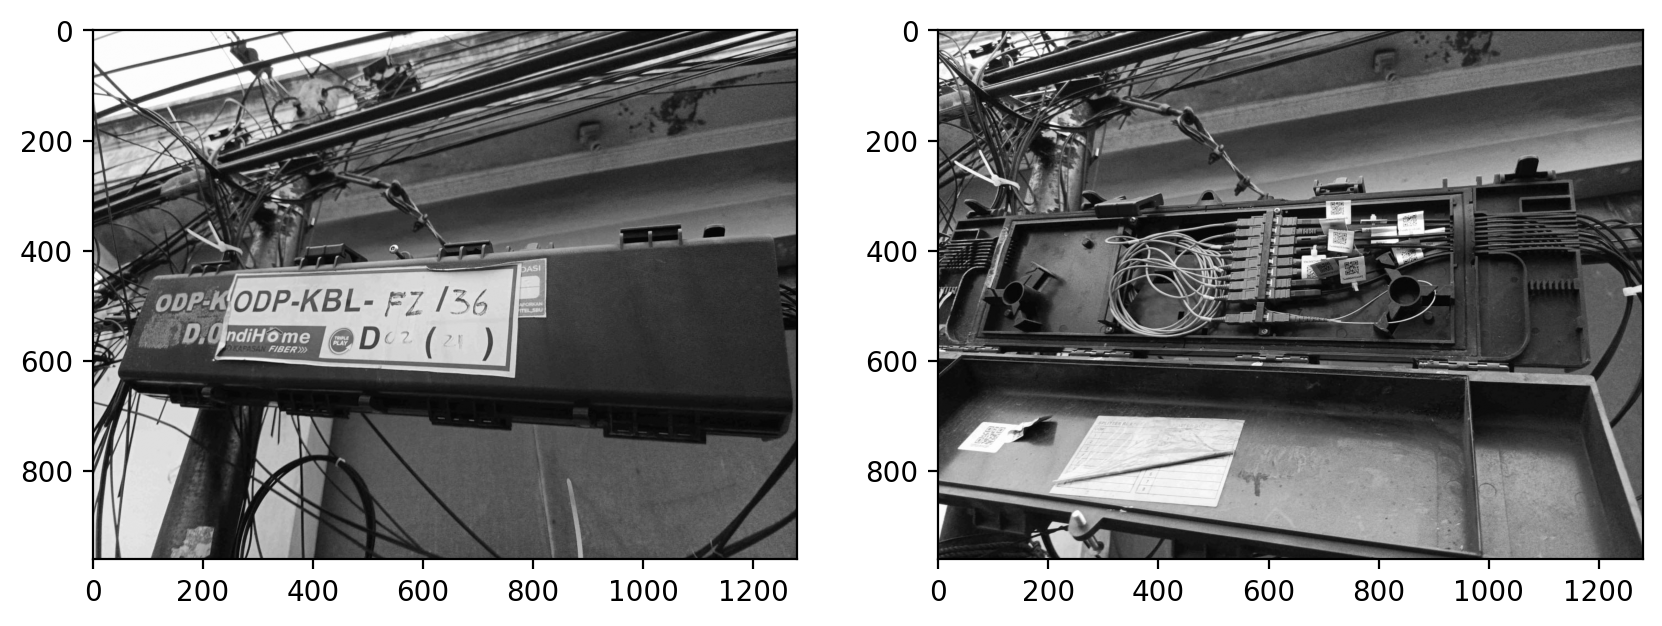

In [7]:
# Task #2: Convert the color image to grayscale.
#
# Use the weights we used before:
#                              Red: 0.299
#                            Green: 0.587
#                             Blue: 0.114
#

# Write your code here

img_outg = np.dot(img_out[...,:3], [0.299,0.587,0.114])
img_ing = np.dot(img_in[...,:3], [0.299,0.587,0.114])

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_outg, cmap='gray')
ax[1].imshow(img_ing, cmap='gray')

/tmp/ipykernel_36201/1123166587.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img_ing.ravel(),256,[0,255])


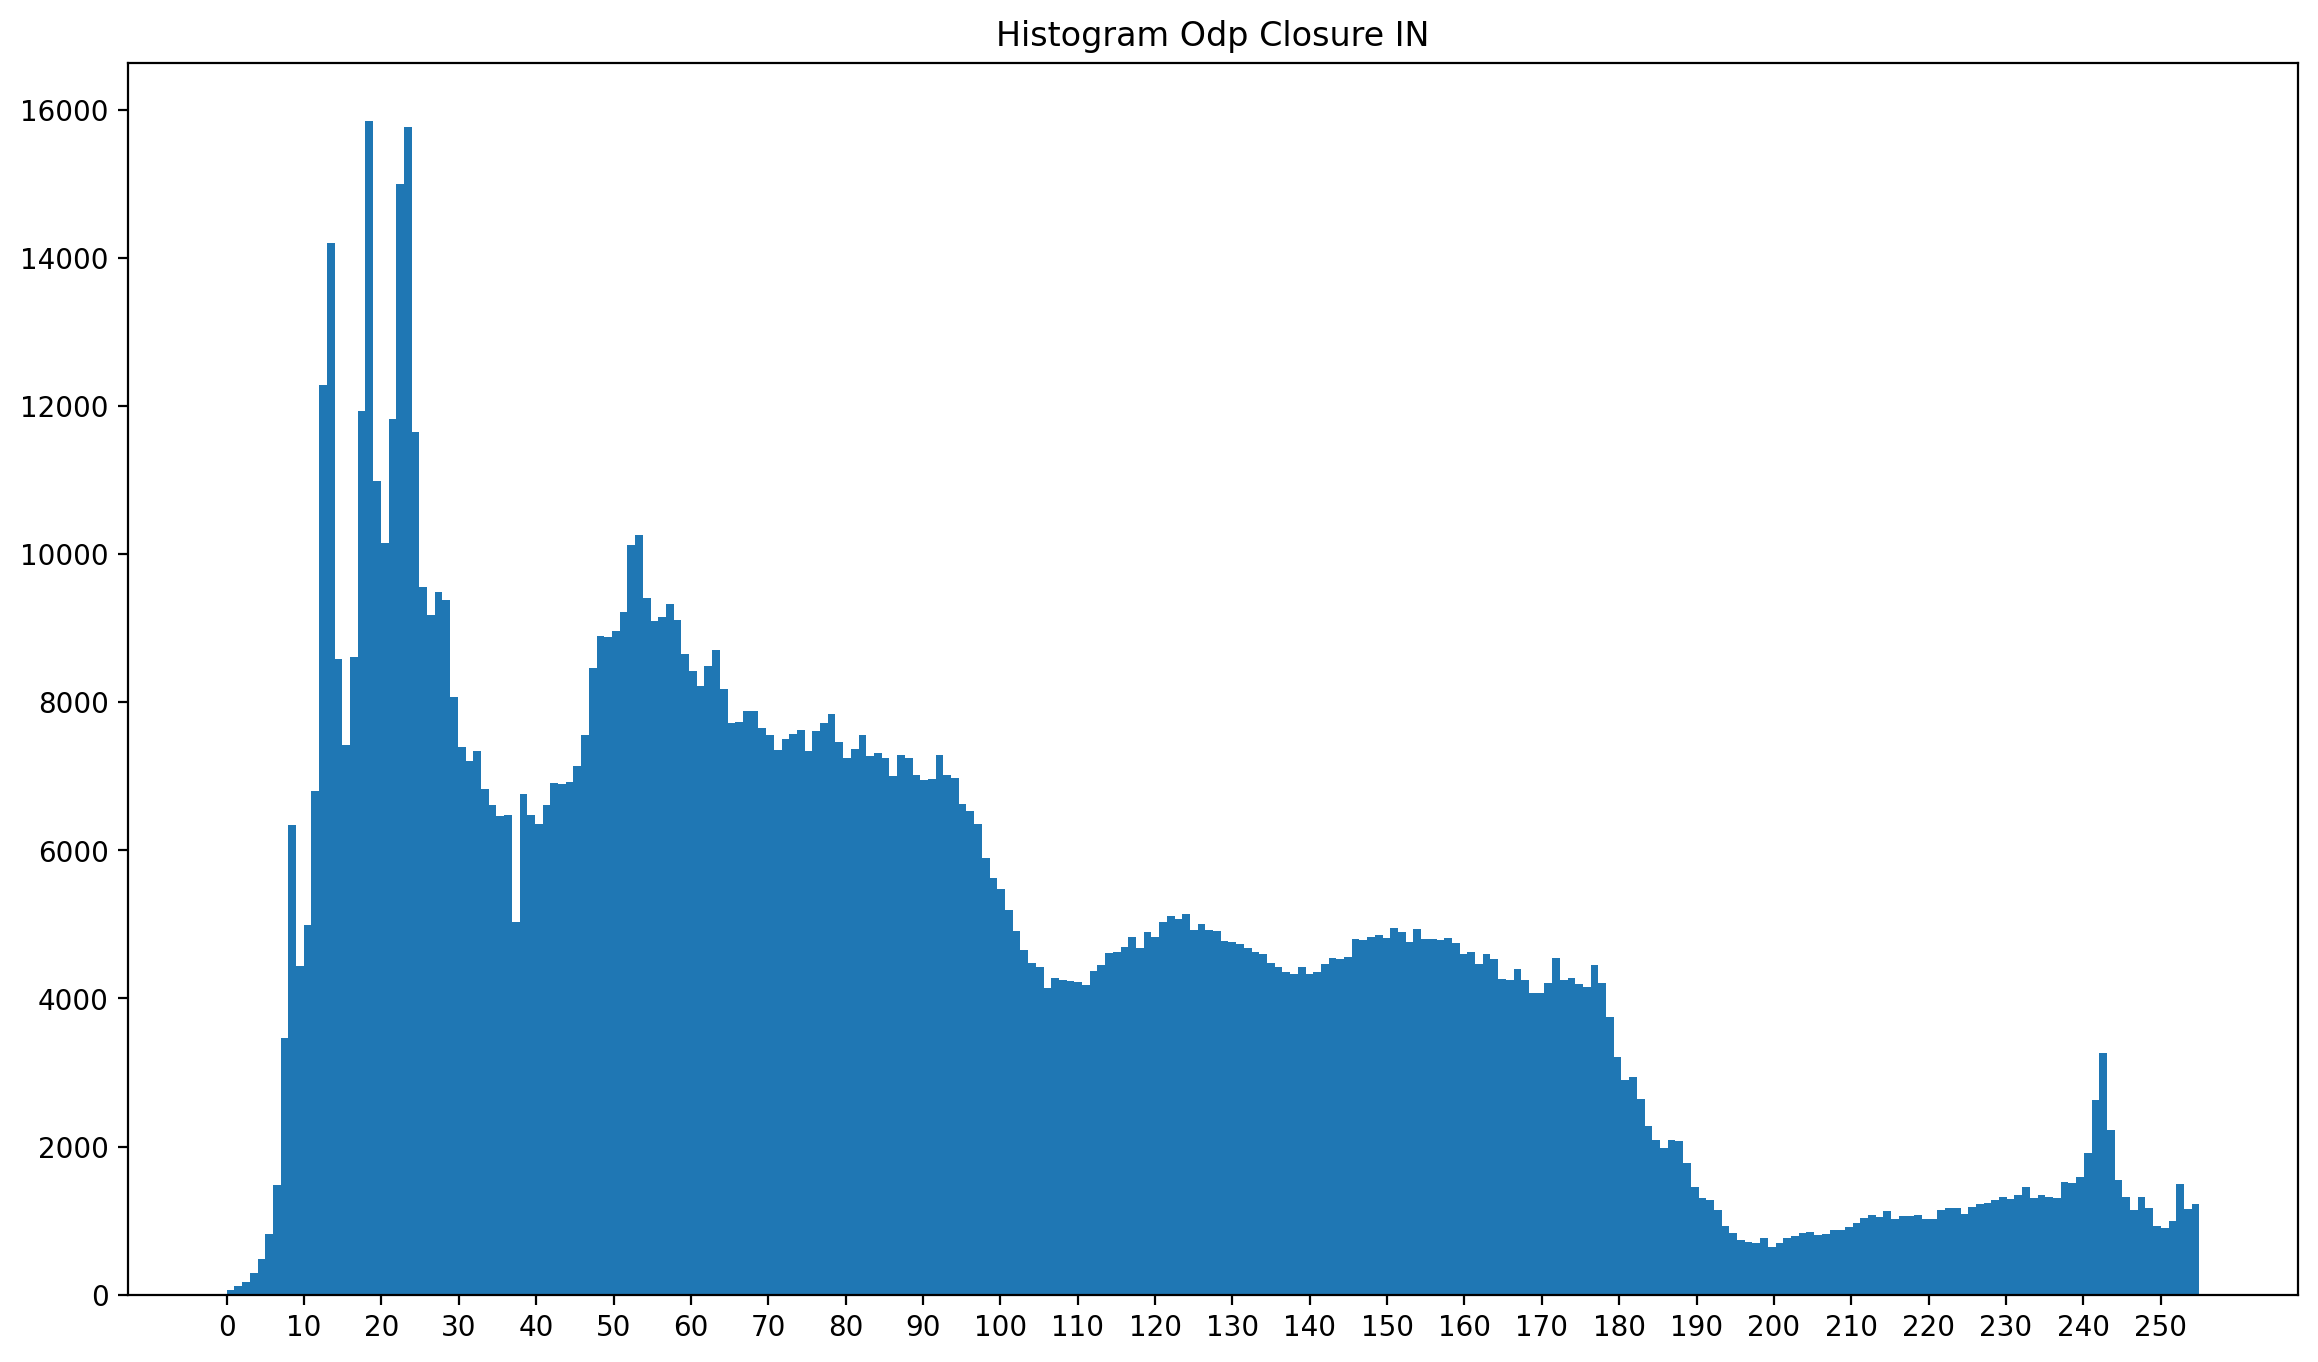

/tmp/ipykernel_36201/1123166587.py:15: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img_outg.ravel(),256,[0,255])


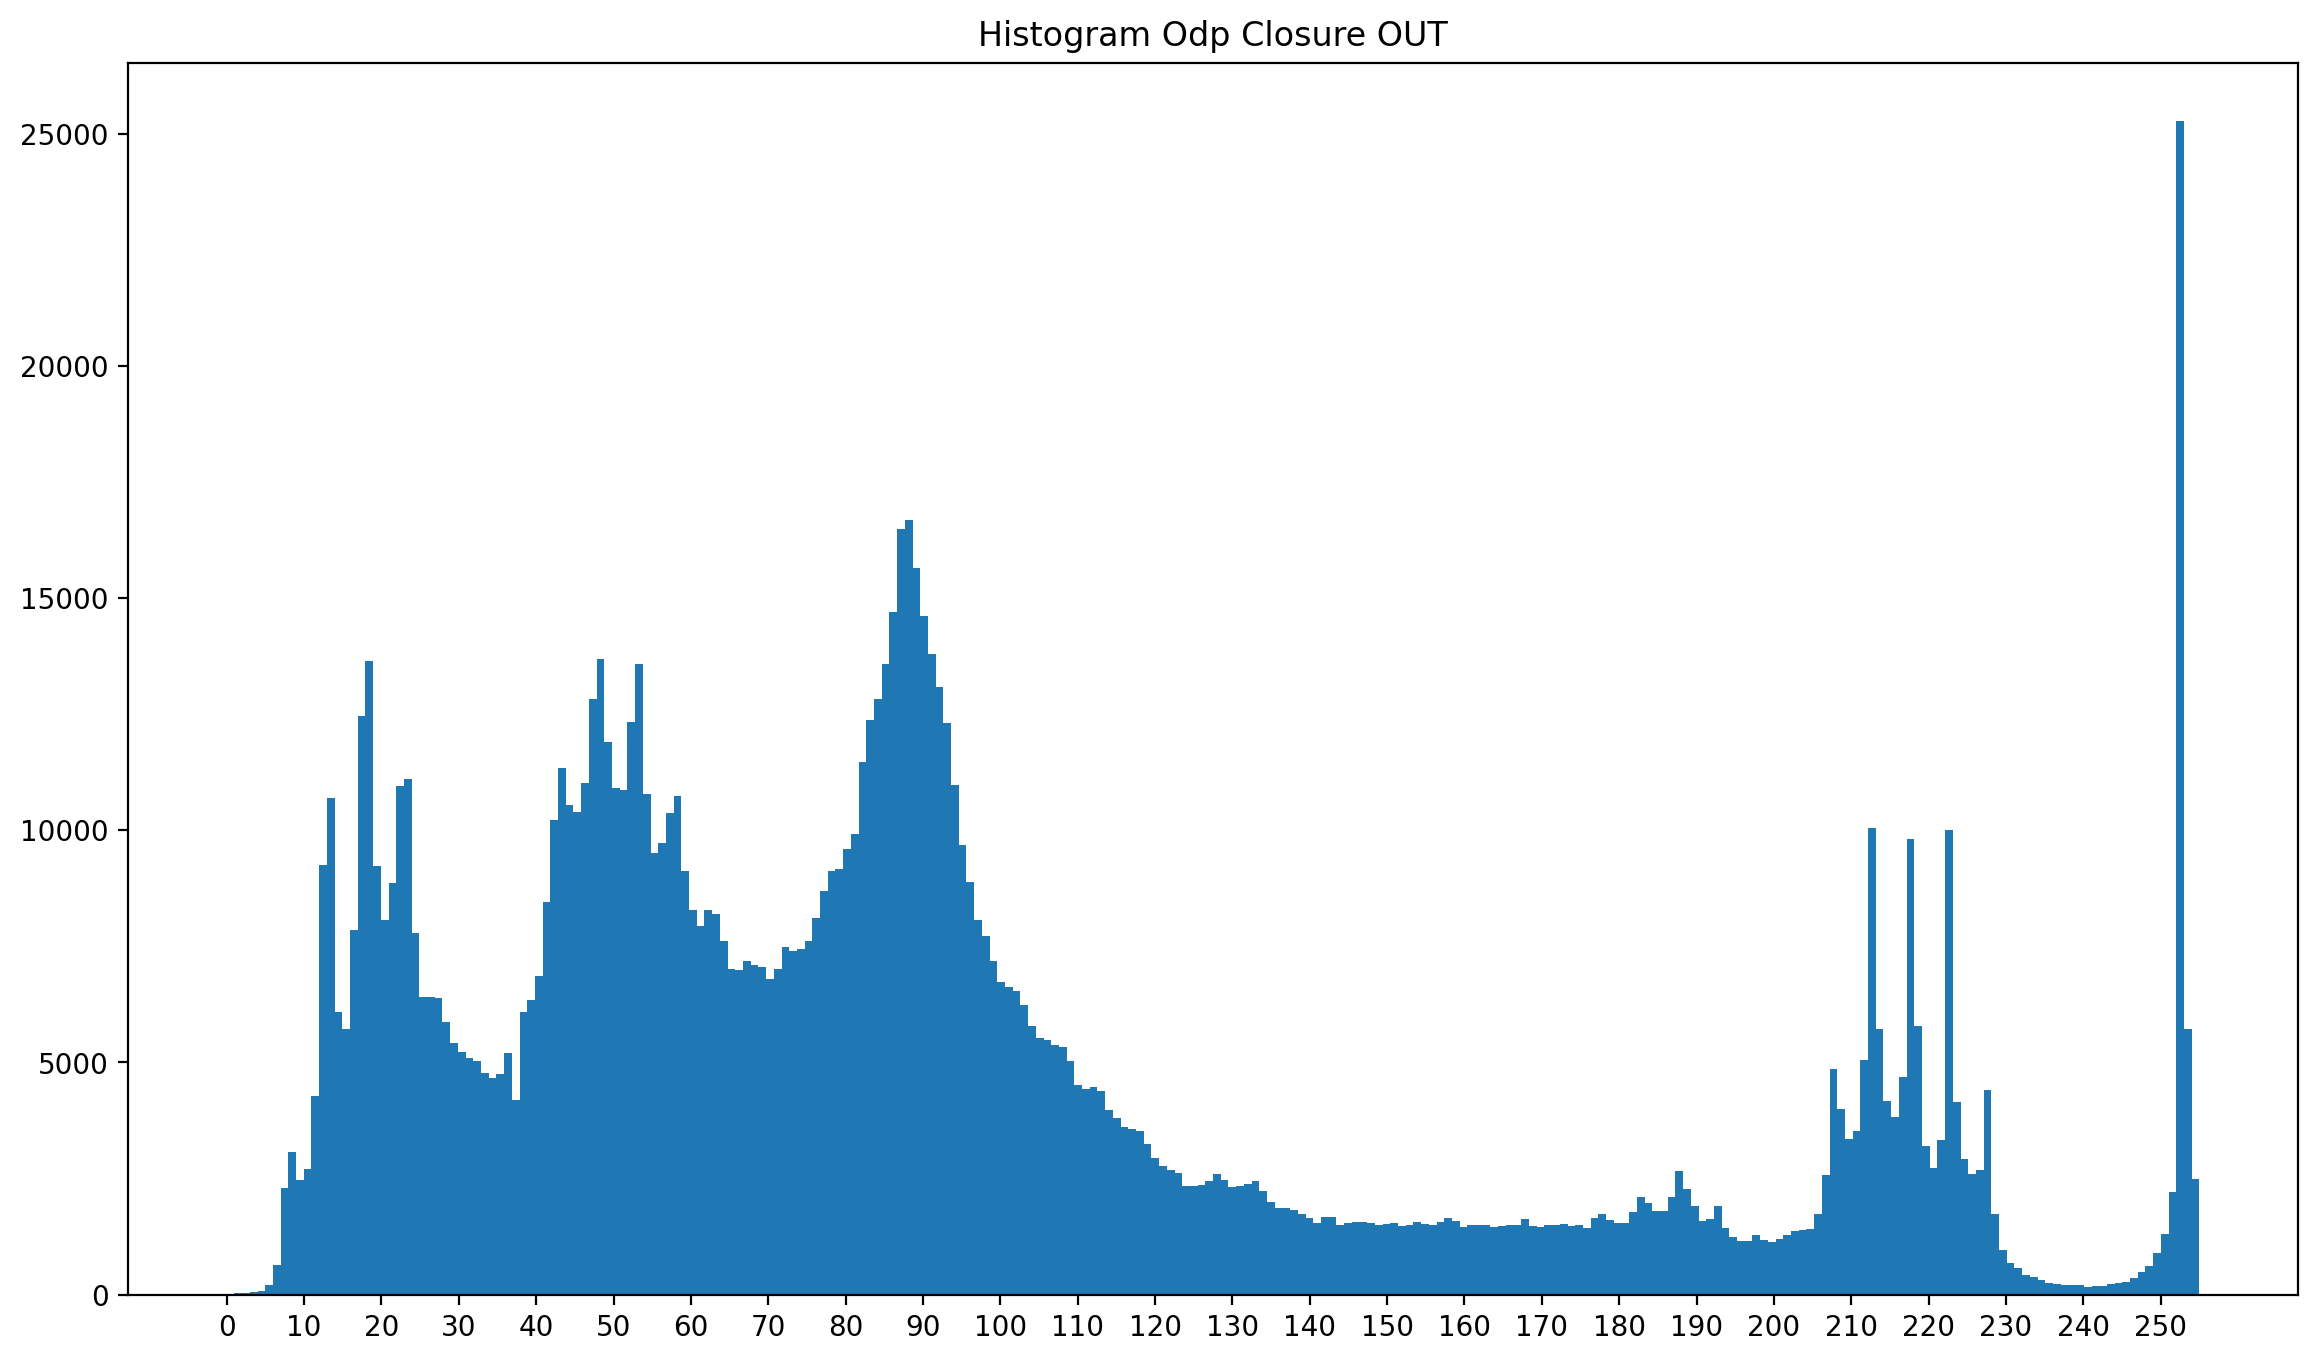

In [8]:
# Task #3: Plot a histogram 
#
# In this cell, plot a histogram of your grayscale image
# and try to come up with a suitable global threshold.

# Write your code here

rcParams['figure.figsize'] = (14,8)
plt.hist(img_ing.ravel(),256,[0,255])
plt.title('Histogram Odp Closure IN')
plt.xticks(np.arange(0, 255, 10))
plt.show()

rcParams['figure.figsize'] = (14,8)
plt.hist(img_outg.ravel(),256,[0,255])
plt.title('Histogram Odp Closure OUT')
plt.xticks(np.arange(0, 255, 10))
plt.show()

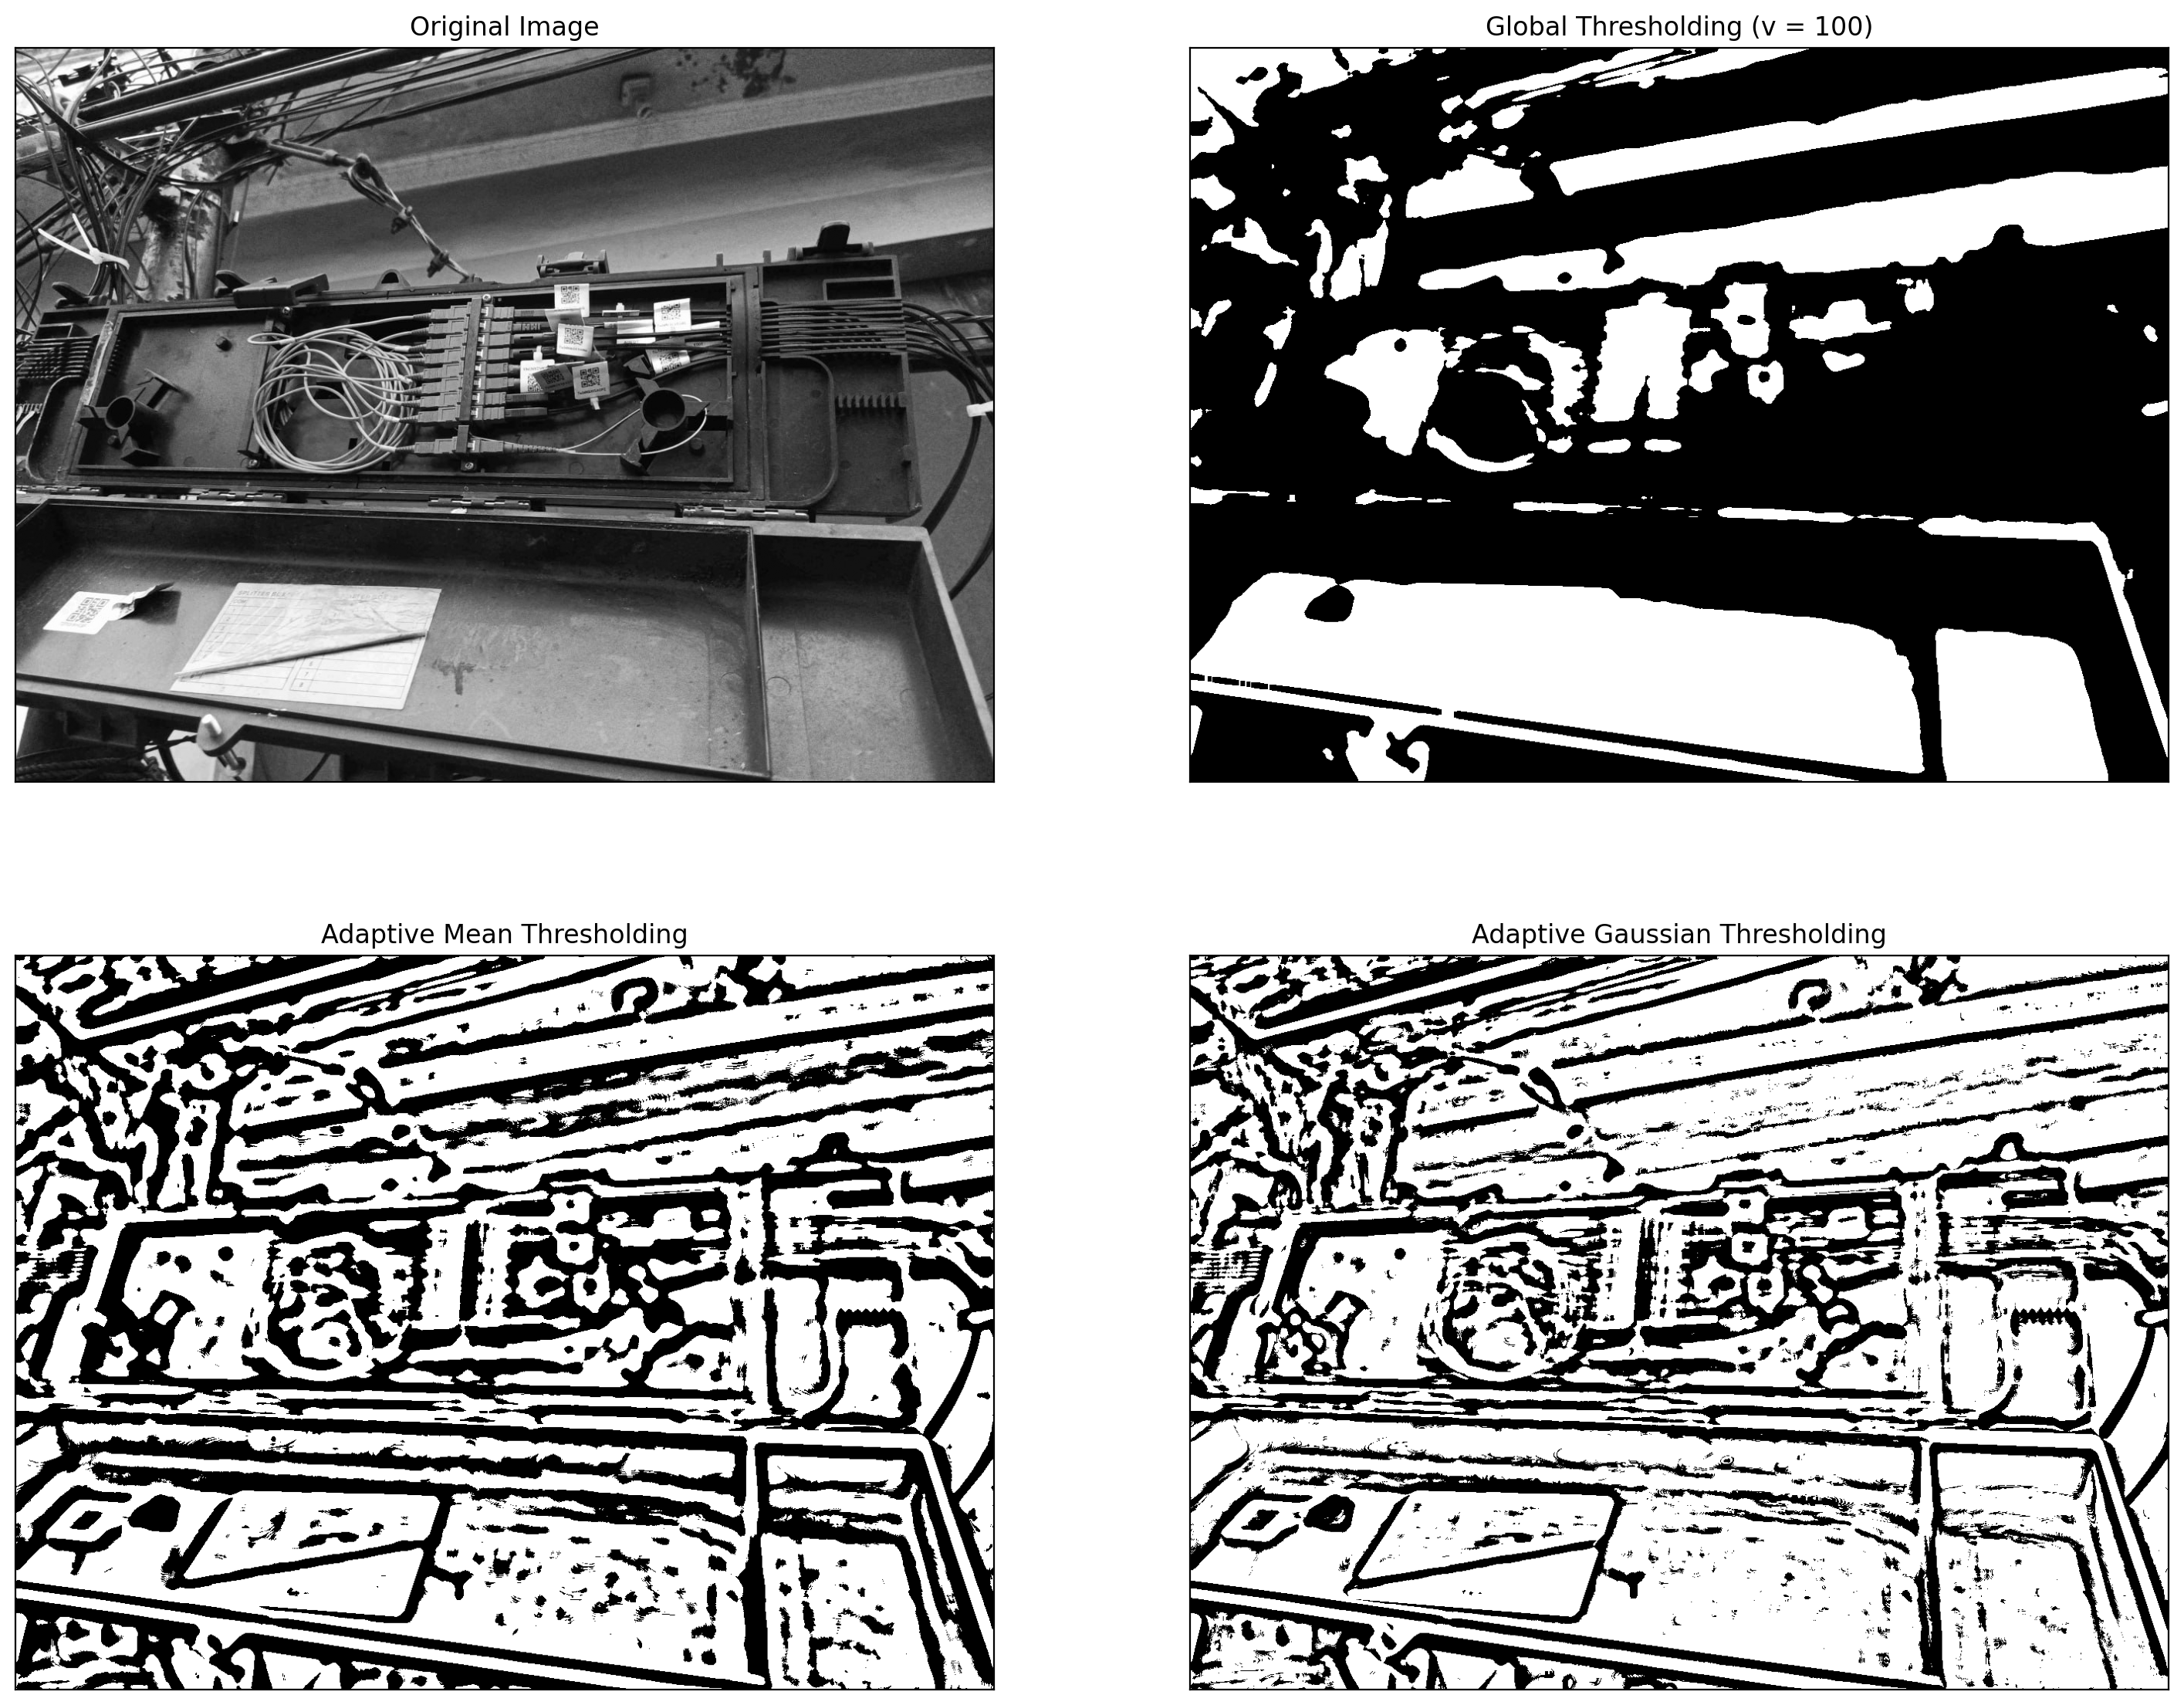

In [9]:
# Task #4: Compare two Black and White Images
#
# Pick two global thresholds from the histogram above and compare  
# the two resulting images. 
# Feel free to use OpenCV or grayscale_to_BW() from EC_CV.py

# Write your code here

rcParams['figure.figsize'] = (18,14)
threshold = 100 # Also try it with 215 and 225
img0 = cv2.imread('odp closure in.jpeg',0)
img = cv2.medianBlur(img0,17)
ret,th1 = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY,33,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,33,2)
titles = ['Original Image', 'Global Thresholding (v = '+str(threshold)+')',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img0, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()